In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows=2000

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [7]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2098
Number of edges: 21716
Average degree:  20.7016


In [8]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 941
Number of edges: 5373
Average degree:  11.4198


Name: 
Type: Graph
Number of nodes: 933
Number of edges: 5373
Average degree:  11.5177
23


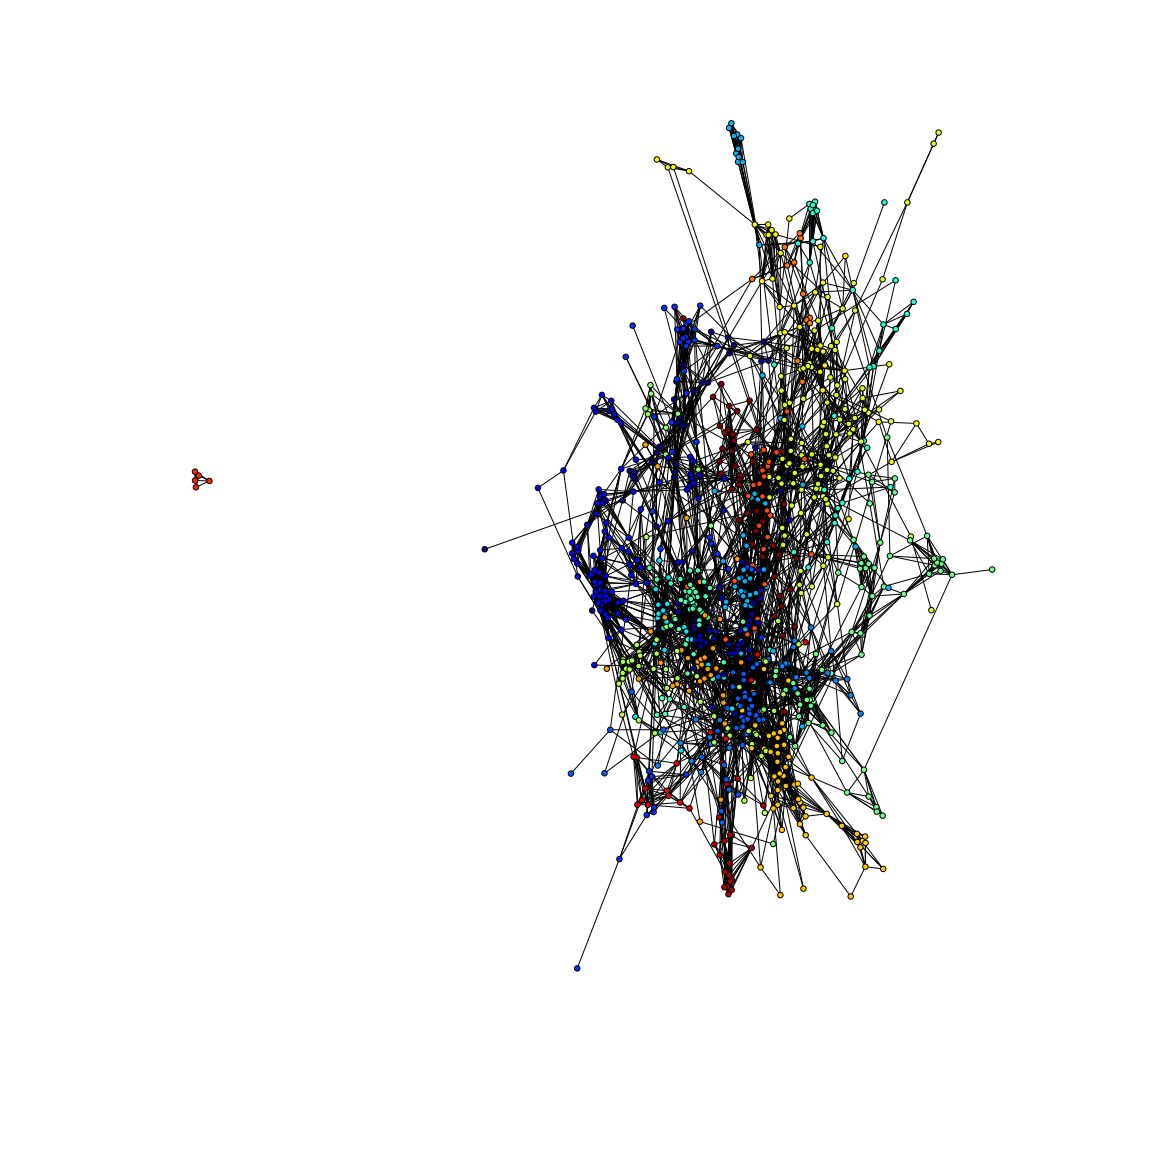

In [9]:
def cluster(g):
    deg = g.degree()
    to_remove = [n for n in deg if deg[n] == 0]
    g.remove_nodes_from(to_remove)
    print nx.info(g)
    spring_pos = nx.spring_layout(g)
    parts = community.best_partition(g)
    community.modularity(parts,g)
    values = [parts.get(node) for node in g.nodes()]
    print max(values)
    plt.figure(figsize=(20,20))
    plt.axis("off")
    nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 30, with_labels = False)
    return(parts)
parts=cluster(g)

In [10]:
#old_nodes_df=nodes
old_nodes_df['cluster']=0
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])
df=old_nodes_df

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [12]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
#docs=df.label+df.DE
docs=df.label

In [14]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [15]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
stop_list.remove('information')
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [16]:
df['ind']=df.index
df['terms']= docs_stemed

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']
    word_filtered=[word for word in words if not(word in ['inform','technolog','system'])]
    words_counter = Counter(word_filtered)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_filtered=[term for term in terms if not(term in ['inform technolog','inform system'])]
    terms_counter= Counter(terms_filtered)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [18]:
dg.sort_values('cluster size',ascending=False)

,cluster size,keyword,key terms
14,94,"[(firm, 17), (invest, 16), (product, 15), (perform, 15), (industri, 11)]","[(technolog invest, 9), (firm perform, 8), (empir investig, 5), (technolog infrastructur, 5), (competit advantag, 4)]"
11,67,"[(project, 21), (risk, 15), (softwar, 13), (outsourc, 13), (manag, 12)]","[(softwar project, 7), (real option, 6), (technolog invest, 5), (technolog outsourc, 4), (technolog project, 4)]"
3,63,"[(group, 33), (support, 18), (electron, 15), (commun, 15), (decis, 9)]","[(group support, 13), (support system, 12), (electron brainstorm, 7), (decis make, 5), (electron commun, 3)]"
16,54,"[(methodolog, 9), (develop, 9), (approach, 7), (error, 6), (disciplin, 5)]","[(system develop, 3), (refer disciplin, 2), (divers inform, 2), (softwar develop, 2), (develop approach, 2)]"
13,52,"[(softwar, 17), (decis, 11), (model, 10), (support, 7), (cognit, 5)]","[(decis support, 5), (softwar develop, 3), (model softwar, 3), (support system, 3), (decis aid, 2)]"
7,50,"[(model, 16), (accept, 14), (adopt, 14), (standard, 13), (usag, 8)]","[(technolog accept, 9), (accept model, 3), (user accept, 3), (technolog adopt, 3), (technolog usag, 3)]"
10,50,"[(knowledg, 42), (manag, 20), (organiz, 10), (process, 6), (compet, 6)]","[(knowledg manag, 14), (data qualiti, 4), (manag system, 3), (organiz knowledg, 3), (knowledg repositori, 2)]"
5,47,"[(measur, 18), (user, 17), (satisfact, 13), (servic, 10), (qualiti, 9)]","[(servic qualiti, 7), (measur inform, 6), (user satisfact, 5), (system servic, 5), (user particip, 4)]"
1,44,"[(comput, 15), (learn, 13), (train, 10), (collabor, 8), (skill, 6)]","[(comput selfefficaci, 4), (collabor learn, 2), (learn comput, 2), (longitudin field, 2), (train method, 2)]"
23,43,"[(manag, 9), (innov, 9), (execut, 7), (requir, 7), (issu, 5)]","[(inform requir, 3), (requir elicit, 3), (technolog innov, 3), (model inform, 2), (dynam capabl, 2)]"


In [19]:
cluster={
    14:'IT & Firms',
    11: 'Software & Sourcing',
    3: 'Group Support',
    16: 'IS Research',
    13: 'Decision Supp.',
    7: 'Tech. Accept.',
    10: 'Knowl. Manage.',
    5: 'User Satisf.',
    1: 'Learn & Train',
    23: 'IS & Innovation',
    15: 'Market & Auct.',
    0: 'E-com & Trust',
    4: 'Website & Search',
    9: 'Supp. Chain',
    2: 'Bus. Process',
    17: 'Organz. Change',
    19: 'Database',
    6: 'IT Strateg.',
    8: 'Online Commun.',
    22: 'IT & Jobs'   
}

In [20]:
node_size=dg['cluster size']*5

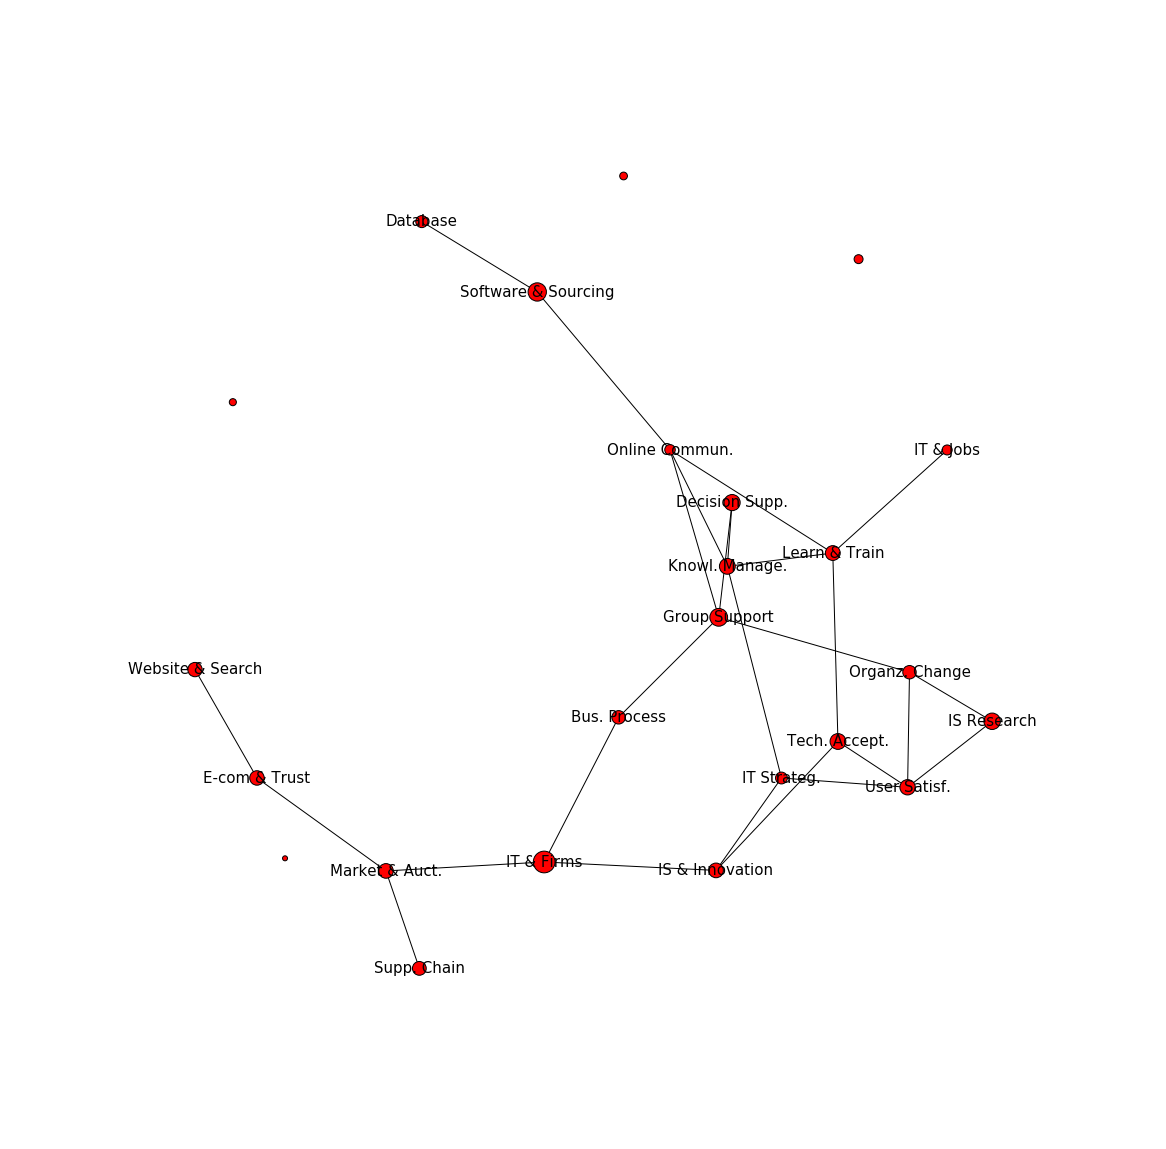

In [21]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
com=community.induced_graph(parts,g, weight='weight')
for (i,j) in com.edges():
    if com[i][j]['weight']<3.5:
        com.remove_edge(i,j)
        
pos = nx.fruchterman_reingold_layout(com)       
plt.figure(figsize=(20,20))
plt.axis("off")        
nx.draw_networkx(com,pos,labels=cluster,cmap = plt.get_cmap("jet"), node_size=node_size , with_labels = True, font_size=15)

In [22]:
df.drop('terms',inplace=True, axis=1)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
#df[df.cluster==16].sort('TC',ascending=False)

In [24]:
#df[['label','cluster']]